In [1]:
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Dense,Conv2D,Dropout,MaxPooling2D,Flatten
from keras.utils import np_utils
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
import random

In [2]:
df = pd.read_csv('FashionMnistMerged.csv')

In [12]:
df_cd_temp = df

In [59]:
mydf1 = df.loc[(df['Dffclt'] <= (2))]
mydf1.shape
               

(13334, 786)

# normal model

In [8]:
myacc = np.zeros((20,5))

for myround in range(1,21):
    random.seed(myround)
    np.random.seed(myround)
    tf.random.set_seed(myround)
    data = df.sample(frac=1, random_state=myround)
    df_train = data.iloc[:20000,:]
    df_test = data.iloc[20000:22000,:]
    df_train = df_train.drop(columns="Dffclt")
    for mydiff in range (5):
        df_test_temp = df_test.loc[(df_test['Dffclt'] >= (mydiff*2)) & (df_test['Dffclt'] <= ((mydiff+1)*2))]
        df_test_temp = df_test_temp.drop(columns="Dffclt")
        
        trainX = df_train.drop(columns="class")
        trainY = df_train['class']
        testX = df_test_temp.drop(columns="class")
        testY = df_test_temp['class']
        trainX=np.array(trainX)
        testX=np.array(testX)
        trainX = trainX.reshape((trainX.shape[0], 28, 28, 1))
        testX = testX.reshape((testX.shape[0], 28, 28, 1))
        trainX = trainX/255
        testX = testX/255
        trainY = np_utils.to_categorical(trainY,10)
        testY = np_utils.to_categorical(testY,10)

        from keras.models import load_model
        model = load_model('FashionMnistNormal'+ str(myround) + '.h5')
        myacc[myround-1,mydiff] = (model.evaluate(testX,testY)[1])


12/12 [==============================] - 0s 6ms/step - loss: 0.0410 - accuracy: 0.9816


13/13 [==============================] - 0s 6ms/step - loss: 0.8283 - accuracy: 0.7220


In [9]:
myacc

array([[0.90514904, 0.99748743, 0.9976415 , 0.97709924, 0.77644229],
       [0.90839696, 1.        , 0.99302328, 0.97435898, 0.77697843],
       [0.90632319, 0.99739581, 0.99538106, 0.97089946, 0.78306878],
       [0.90825689, 0.99216712, 0.99459457, 0.97120416, 0.80232561],
       [0.91571754, 0.995     , 1.        , 0.98511165, 0.75064933],
       [0.89786226, 0.99498749, 0.98930484, 0.96756756, 0.77752292],
       [0.91533178, 1.        , 0.99520385, 0.973822  , 0.77999997],
       [0.9052369 , 0.99216712, 0.99753088, 0.97283953, 0.77093595],
       [0.90072638, 1.        , 0.99226803, 0.98673743, 0.78535354],
       [0.91379309, 0.99492383, 0.99494952, 0.98522168, 0.77135676],
       [0.89024389, 0.99729729, 1.        , 0.969697  , 0.78846157],
       [0.9040404 , 0.99746192, 1.        , 0.97680414, 0.81603771],
       [0.93069309, 0.99501246, 0.99513382, 0.96978021, 0.81190479],
       [0.9232614 , 1.        , 0.9973262 , 0.96306068, 0.79101121],
       [0.91645569, 0.99512196, 1.

In [10]:
nn = 0
meanPerBin = np.zeros(5)
for myturn in range (5):
    meanPerBin[myturn] = np.mean(myacc[:, myturn])
    nn += (np.mean(myacc[:, myturn]))
print(nn/5)
print(meanPerBin)

0.9307552939653396
[0.90857169 0.99608696 0.99548023 0.97322462 0.78041297]


In [13]:
myhist = np.zeros((20,5))

for myround in range(1,21):
    df_cd = df_cd_temp.sample(frac=1, random_state=myround)
    df_cd1 =  df_cd#.drop(columns="Dffclt")
    df_train = df_cd1.iloc[:20000,:]
    df_test = df_cd1.iloc[20000:22000,:]
    df_train = df_train.drop(columns="Dffclt")
    for mydiff in range (5):
        df_test_temp = df_test.loc[(df_test['Dffclt'] >= (mydiff*2)) & (df_test['Dffclt'] <= ((mydiff+1)*2))]
        myhist[myround-1,mydiff] = len(df_test_temp)
myhist

array([[369., 398., 424., 393., 416.],
       [393., 370., 430., 390., 417.],
       [427., 384., 433., 378., 378.],
       [436., 383., 370., 382., 430.],
       [439., 400., 373., 403., 385.],
       [421., 399., 374., 370., 436.],
       [437., 364., 417., 382., 400.],
       [401., 383., 405., 405., 406.],
       [413., 426., 388., 377., 396.],
       [406., 394., 396., 406., 398.],
       [410., 370., 375., 429., 416.],
       [396., 394., 398., 388., 424.],
       [404., 401., 411., 364., 420.],
       [417., 385., 374., 379., 445.],
       [395., 410., 377., 419., 399.],
       [421., 369., 376., 427., 408.],
       [384., 430., 388., 417., 381.],
       [407., 375., 408., 394., 416.],
       [399., 395., 417., 381., 408.],
       [384., 414., 393., 399., 410.]])

In [14]:
myhistAccum = np.zeros (5)
for histindex in range (5):
    myhistAccum[histindex] = np.sum(myhist[:, histindex])
print(myhistAccum)

[8159. 7844. 7927. 7883. 8189.]


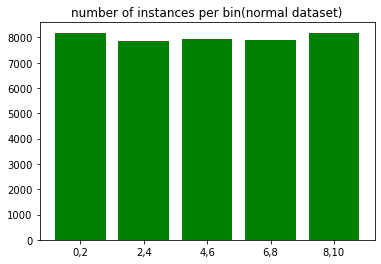

In [15]:
plt.bar(['0,2','2,4','4,6','6,8','8,10'], myhistAccum, color='green')
plt.title("number of instances per bin(normal dataset)")
plt.show()

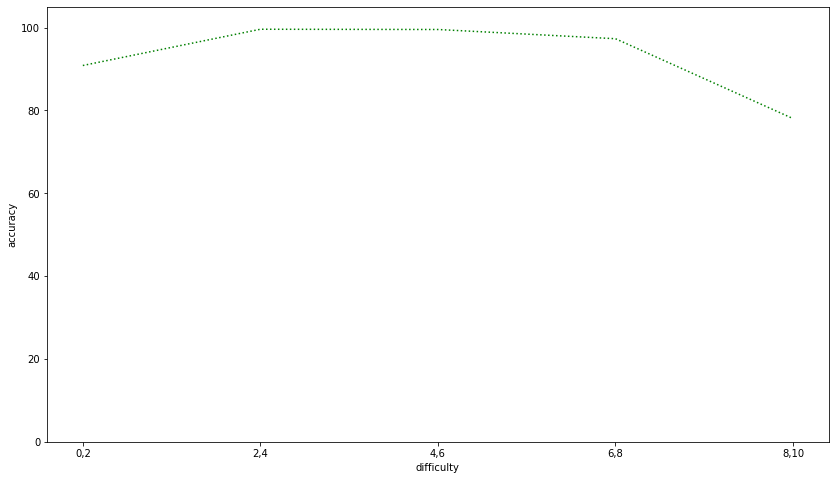

In [17]:
plt.xlabel("difficulty")
plt.ylabel("accuracy")
plt.rcParams['figure.figsize'] = [14, 8]
plt.ylim([0, 105])
plt.plot(['0,2','2,4','4,6','6,8','8,10'], meanPerBin*100, ls=':', color = 'green')
plt.show()

In [15]:
#meanPerBin = [0.79911429, 0.8317701 , 0.8279106 , 0.81521758, 0.81394129,0.79659775, 0.78136204, 0.7744887 , 0.74064942, 0.67989944]
#meanPerBin = np.array(meanPerBin)

# contaminated model

In [23]:
myaccCont = np.zeros((20,5))

for myround in range(1,21):
    random.seed(myround)
    np.random.seed(myround)
    tf.random.set_seed(myround)
    df_cd = df.sample(frac=1, random_state=myround)
    hardest = df_cd[25000:]
    hardest = hardest.sort_values('Dffclt', ascending=False)
#     hardest =  hardest.drop(columns="Dffclt")
    hardest = hardest.iloc[:11000,:]
    hardest = hardest.sample(frac=1, random_state=myround)
    contaminated_trianset = hardest.iloc[:10000,:]
    hardest = hardest.iloc[10000:11000,:]
    data = df_cd#.drop(columns="Dffclt")
    df_train = data.iloc[:10000,:]
    df_train = df_train.append(contaminated_trianset, ignore_index=True)
    df_train = df_train.sample(frac=1, random_state=myround)
    df_test = data.iloc[20000:21000,:]
    df_test = df_test.append(hardest, ignore_index=True)
    df_test = df_test.sample(frac=1, random_state=myround)
    df_train = df_train.drop(columns="Dffclt")
    for mydiff in range (5):
        df_test_temp = df_test.loc[(df_test['Dffclt'] >= (mydiff*2)) & (df_test['Dffclt'] <= ((mydiff+1)*2))]
        df_test_temp = df_test_temp.drop(columns="Dffclt")
        trainX = df_train.drop(columns="class")
        trainY = df_train['class']
        testX = df_test_temp.drop(columns="class")
        testY = df_test_temp['class']
        trainX=np.array(trainX)
        testX=np.array(testX)
        trainX = trainX.reshape((trainX.shape[0], 28, 28, 1))
        testX = testX.reshape((testX.shape[0], 28, 28, 1))
        trainX = trainX/255
        testX = testX/255
        trainY = np_utils.to_categorical(trainY,10)
        testY = np_utils.to_categorical(testY,10)
        from keras.models import load_model
        model = load_model('FashionMnistContaminated'+ str(myround) + '.h5')
        myaccCont[myround-1,mydiff] = (model.evaluate(testX,testY)[1])


30/30 [==============================] - 0s 6ms/step - loss: 0.5307 - accuracy: 0.8339


30/30 [==============================] - 0s 7ms/step - loss: 0.5001 - accuracy: 0.8367


In [24]:
myaccCont

array([[0.91623038, 1.        , 0.98492461, 0.98109245, 0.83640301],
       [0.91469193, 0.98850572, 0.99541283, 0.99054372, 0.83778232],
       [0.89756095, 1.        , 0.98660713, 0.97757846, 0.8331539 ],
       [0.90186918, 1.        , 0.98876405, 0.9733656 , 0.82565129],
       [0.91666669, 0.99523807, 0.98591548, 0.97872341, 0.84947366],
       [0.91584158, 0.99484539, 0.99468082, 0.98581558, 0.82980865],
       [0.94396549, 0.99441344, 0.98104268, 0.98500001, 0.83128834],
       [0.90099013, 0.99462366, 0.9952153 , 0.96581197, 0.8331551 ],
       [0.93137252, 0.99561405, 0.97422683, 0.98039216, 0.82712215],
       [0.9187817 , 0.99509805, 0.99476439, 0.97391301, 0.8364979 ],
       [0.87155962, 1.        , 1.        , 0.97592998, 0.8073684 ],
       [0.89690721, 1.        , 0.98989898, 0.97350991, 0.82461536],
       [0.93650794, 0.99512196, 1.        , 0.97011495, 0.83505154],
       [0.93809521, 1.        , 0.99479169, 0.96144581, 0.80947578],
       [0.91959798, 0.9952153 , 0.

In [25]:
nnCont = 0
meanPerBinCont = np.zeros(5)
for myturn in range (5):
    meanPerBinCont[myturn] = np.mean(myaccCont[:, myturn])
    nnCont += (np.mean(myaccCont[:, myturn]))
print(nnCont/5)
print(meanPerBinCont)

0.9414011424779891
[0.91473156 0.99643455 0.99000095 0.97472413 0.83111452]


In [26]:
myhistCont = np.zeros((20,5))

for myround in range(1,21):
    df_cd = df_cd_temp.sample(frac=1, random_state=myround)
    hardest= df_cd[25000:]
    hardest=hardest.sort_values('Dffclt', ascending=False)
    #hardest=  hardest.drop(columns="Dffclt")
    hardest = hardest.iloc[:11000,:]
    shuffled_hardest = hardest.sample(frac=1, random_state=myround)
    contaminated_trianset = shuffled_hardest.iloc[:10000,:]
    hardest = shuffled_hardest.iloc[10000:11000,:]
    df_cd1 =  df_cd#.drop(columns="Dffclt")
    df_train = df_cd1.iloc[:10000,:]
    df_train = df_train.append(contaminated_trianset, ignore_index=True)
    df_train = df_train.sample(frac=1, random_state=myround)
    df_train = df_train.drop(columns="Dffclt")
    df_test = df_cd1.iloc[20000:21000,:]
    df_test = df_test.append(hardest, ignore_index=True)
    df_test = df_test.sample(frac=1, random_state=myround)
    for mydiff in range (5):
        df_test_temp = df_test.loc[(df_test['Dffclt'] >= (mydiff*2)) & (df_test['Dffclt'] <= ((mydiff+1)*2))]
        myhistCont[myround-1,mydiff] = len(df_test_temp)
myhistCont

array([[191., 211., 199., 476., 923.],
       [211., 174., 218., 423., 974.],
       [205., 196., 224., 446., 929.],
       [214., 197., 178., 413., 998.],
       [204., 210., 213., 423., 950.],
       [202., 194., 188., 423., 993.],
       [232., 179., 211., 400., 978.],
       [202., 186., 209., 468., 935.],
       [204., 228., 194., 408., 966.],
       [197., 204., 191., 460., 948.],
       [218., 180., 195., 457., 950.],
       [194., 180., 198., 453., 975.],
       [189., 205., 201., 435., 970.],
       [210., 191., 192., 415., 992.],
       [199., 209., 179., 443., 970.],
       [196., 173., 202., 449., 980.],
       [175., 211., 199., 453., 962.],
       [202., 194., 202., 434., 968.],
       [208., 198., 199., 462., 933.],
       [190., 221., 199., 441., 949.]])

In [27]:
myhistAccumCont = np.zeros (5)
for histindex in range (5):
    myhistAccumCont[histindex] = np.sum(myhistCont[:, histindex])
print(myhistAccumCont)

[ 4043.  3941.  3991.  8782. 19243.]


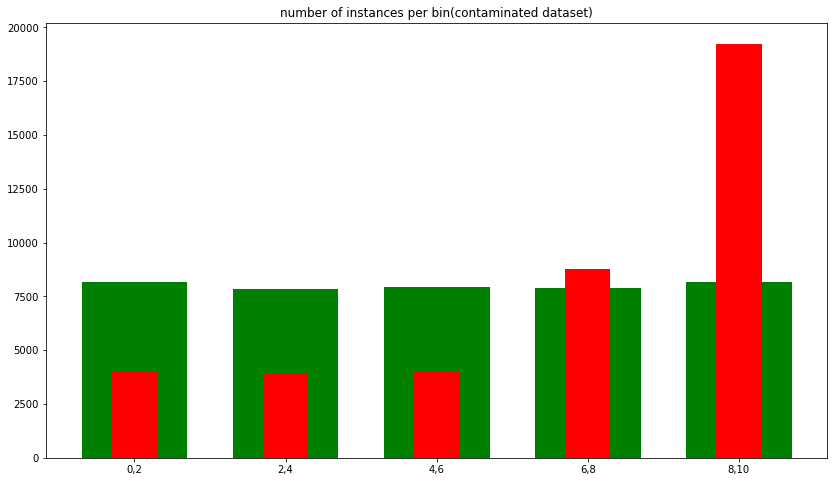

In [28]:
plt.bar(['0,2','2,4','4,6','6,8','8,10'], myhistAccum,width=0.7, color='green')
plt.bar(['0,2','2,4','4,6','6,8','8,10'], myhistAccumCont,width=0.3, color = 'red')

plt.title("number of instances per bin(contaminated dataset)")
plt.show()

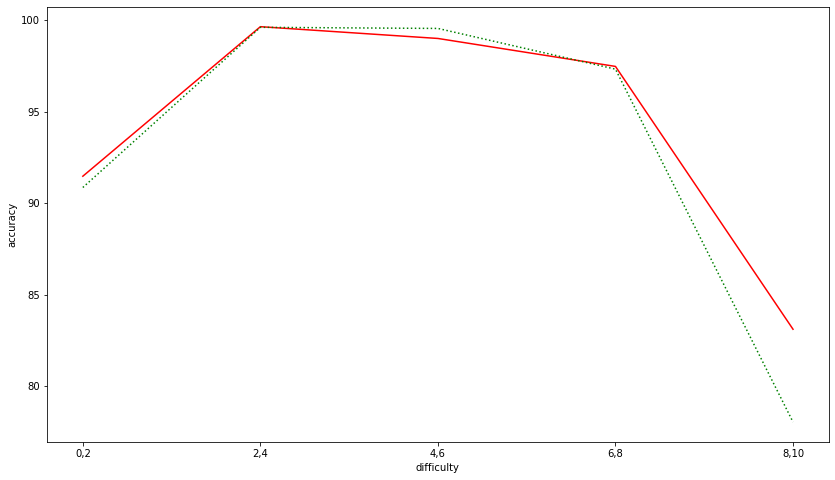

In [31]:
plt.xlabel("difficulty")
plt.ylabel("accuracy")
plt.rcParams['figure.figsize'] = [14, 8]
#plt.ylim([0, 105])
plt.plot(['0,2','2,4','4,6','6,8','8,10'], meanPerBinCont*100, ls='-', color = 'red')
plt.plot(['0,2','2,4','4,6','6,8','8,10'], meanPerBin*100, ls=':', color = 'green')
plt.show()

# Contaminate model on normal data

In [32]:
myaccCont_nor = np.zeros((20,5))

for myround in range(1,21):
    random.seed(myround)
    np.random.seed(myround)
    tf.random.set_seed(myround)
    data = df.sample(frac=1, random_state=myround)
    df_train = data.iloc[:20000,:]
    df_test = data.iloc[20000:22000,:]
    df_train = df_train.drop(columns="Dffclt")
    for mydiff in range (5):
        df_test_temp = df_test.loc[(df_test['Dffclt'] >= (mydiff*2)) & (df_test['Dffclt'] <= ((mydiff+1)*2))]
        df_test_temp = df_test_temp.drop(columns="Dffclt")
        
        trainX = df_train.drop(columns="class")
        trainY = df_train['class']
        testX = df_test_temp.drop(columns="class")
        testY = df_test_temp['class']
        trainX=np.array(trainX)
        testX=np.array(testX)
        trainX = trainX.reshape((trainX.shape[0], 28, 28, 1))
        testX = testX.reshape((testX.shape[0], 28, 28, 1))
        trainX = trainX/255
        testX = testX/255
        trainY = np_utils.to_categorical(trainY,10)
        testY = np_utils.to_categorical(testY,10)
        from keras.models import load_model
        model = load_model('FashionMnistContaminated'+ str(myround) + '.h5')
        myaccCont_nor[myround-1,mydiff] = (model.evaluate(testX,testY)[1])


12/12 [==============================] - 0s 6ms/step - loss: 0.0734 - accuracy: 0.9711


13/13 [==============================] - 0s 7ms/step - loss: 0.5110 - accuracy: 0.8341


In [33]:
nnCont_nor = 0
meanPerBinCont_nor = np.zeros(5)
for myturn in range (5):

    meanPerBinCont_nor[myturn] = np.mean(myaccCont_nor[:, myturn])
    nnCont_nor += (np.mean(myaccCont_nor[:, myturn]))
print(nnCont_nor/5)
print(meanPerBinCont_nor)

0.9418103724718094
[0.90819363 0.99643015 0.99205411 0.97696814 0.83540584]


In [34]:
myhistCont_nor = np.zeros((5,10))

for myroundCont_nor in range(1,6):
    df_cd = df_cd_temp.sample(frac=1, random_state=myroundCont_nor)
    df_cd1 =  df_cd#.drop(columns="Dffclt")
    df_train = df_cd1.iloc[:20000,:]
    df_test = df_cd1.iloc[20000:22000,:]
    df_train = df_train.drop(columns="Dffclt")
    for mydiff in range (5):
        df_test_temp = df_test.loc[(df_test['Dffclt'] >= (mydiff*2)) & (df_test['Dffclt'] <= ((mydiff+1)*2))]
        myhistCont_nor[myroundCont_nor-1,mydiff] = len(df_test_temp)
myhistCont_nor

array([[369., 398., 424., 393., 416.,   0.,   0.,   0.,   0.,   0.],
       [393., 370., 430., 390., 417.,   0.,   0.,   0.,   0.,   0.],
       [427., 384., 433., 378., 378.,   0.,   0.,   0.,   0.,   0.],
       [436., 383., 370., 382., 430.,   0.,   0.,   0.,   0.,   0.],
       [439., 400., 373., 403., 385.,   0.,   0.,   0.,   0.,   0.]])

In [35]:
myhistAccumCont_nor = np.zeros (5)
for histindex in range (5):
    myhistAccumCont_nor[histindex] = np.sum(myhistCont_nor[:, histindex])
print(myhistAccumCont_nor)

[2064. 1935. 2030. 1946. 2026.]


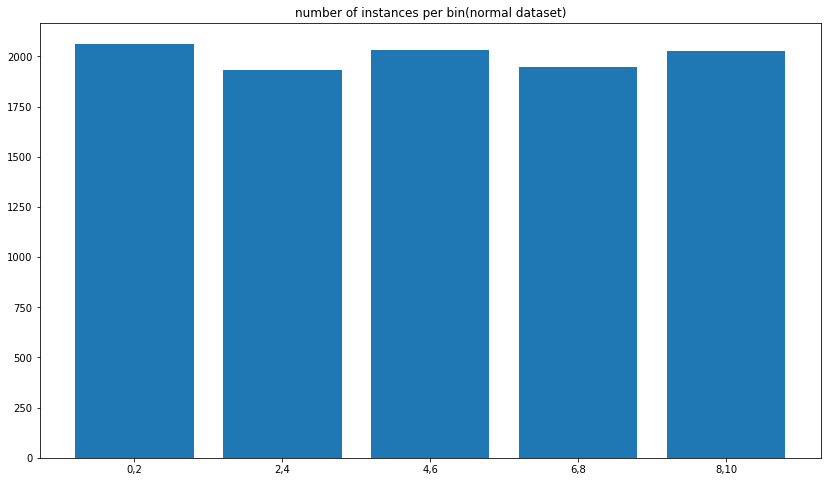

In [36]:
plt.bar(['0,2','2,4','4,6','6,8','8,10'], myhistAccumCont_nor)
plt.title("number of instances per bin(normal dataset)")
plt.show()

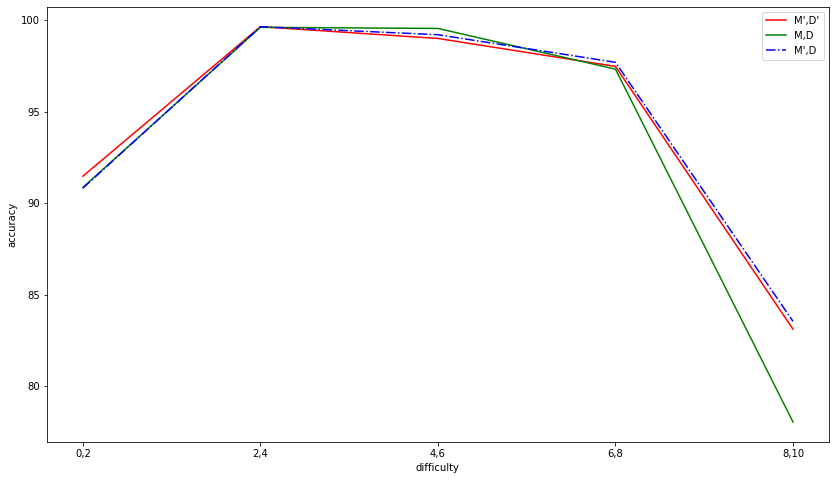

In [38]:
plt.xlabel("difficulty")
plt.ylabel("accuracy")
#plt.ylim([0, 100])
plt.plot(['0,2','2,4','4,6','6,8','8,10'], meanPerBinCont*100, ls='-', color = 'red')
plt.plot(['0,2','2,4','4,6','6,8','8,10'], meanPerBin*100, ls='-', color = 'green')
plt.plot(['0,2','2,4','4,6','6,8','8,10'], meanPerBinCont_nor*100, ls='-.', color = 'blue')
plt.legend(["M',D'","M,D", "M',D"])
plt.show()

# Balanced dataset

In [39]:
myaccBal = np.zeros((20,5))

for myround in range(1,21):
    random.seed(myround)
    np.random.seed(myround)
    tf.random.set_seed(myround)
    df_cd = df.sample(frac=1, random_state=myround)
    hardest = df_cd[25000:]
    hardest = hardest.sort_values('Dffclt', ascending=False)
    hardestbalanced = hardest[:1]
    for item_class in range (10):
        hardestTemp = hardest[hardest['class']==item_class]
        hardestbalanced = hardestbalanced.append(hardestTemp.iloc[:1100,:], ignore_index=True)
    hardestbalanced = hardestbalanced.iloc[1:,:]
    hardestbalanced = hardestbalanced.sample(frac=1, random_state=myround)
    contaminated_trianset = hardestbalanced.iloc[1000:11000,:]
    hardest = hardestbalanced.iloc[:1000,:]
    data = df_cd#.drop(columns="Dffclt")
    df_train = data.iloc[:10000,:]
    df_train = df_train.append(contaminated_trianset, ignore_index=True)
    df_train = df_train.sample(frac=1, random_state=myround)
    df_test = data.iloc[20000:21000,:]
    df_test = df_test.append(hardest, ignore_index=True)
    df_test = df_test.sample(frac=1, random_state=myround)
    df_train = df_train.drop(columns="Dffclt")
    for mydiff in range (5):
        df_test_temp = df_test.loc[(df_test['Dffclt'] >= (mydiff*2)) & (df_test['Dffclt'] <= ((mydiff+1)*2))]
        df_test_temp = df_test_temp.drop(columns="Dffclt")
        trainX = df_train.drop(columns="class")
        trainY = df_train['class']
        testX = df_test_temp.drop(columns="class")
        testY = df_test_temp['class']
        trainX=np.array(trainX)
        testX=np.array(testX)
        trainX = trainX.reshape((trainX.shape[0], 28, 28, 1))
        testX = testX.reshape((testX.shape[0], 28, 28, 1))
        trainX = trainX/255
        testX = testX/255
        trainY = np_utils.to_categorical(trainY,10)
        testY = np_utils.to_categorical(testY,10)
        from keras.models import load_model
        model = load_model('FashionMnistBalanced'+ str(myround) + '.h5')
        myaccBal[myround-1,mydiff] = (model.evaluate(testX,testY)[1])


26/26 [==============================] - 0s 7ms/step - loss: 0.4756 - accuracy: 0.8362


26/26 [==============================] - 0s 6ms/step - loss: 0.6264 - accuracy: 0.8022


In [40]:
nnBal = 0
meanPerBinBal = np.zeros(5)
for myturn in range (5):
    print((np.mean(myaccBal[:, myturn])))
    meanPerBinBal[myturn] = np.mean(myaccBal[:, myturn])
    nnBal += (np.mean(myaccBal[:, myturn]))
nnBal/5

0.9188845992088318
0.9966972798109055
0.9926039725542068
0.9765224158763885
0.8114958137273789


0.9392408162355423

In [41]:
myhistBal = np.zeros((20,5))

for myround in range(1,21):
    df_cd = df_cd_temp.sample(frac=1, random_state=myround)
    hardest= df_cd[25000:]
    hardest=hardest.sort_values('Dffclt', ascending=False)
    hardestbalanced = hardest[:1]
    for item_class in range (10):
        hardestTemp = hardest[hardest['class']==item_class]
        hardestbalanced = hardestbalanced.append(hardestTemp.iloc[:1100,:], ignore_index=True)

    hardestbalanced = hardestbalanced.iloc[1:,:]
    hardestbalanced = hardestbalanced.sample(frac=1, random_state=myround)
    #hardestbalanced=  hardestbalanced.drop(columns="Dffclt")
    contaminated_trianset = hardestbalanced.iloc[1000:11000,:]
    hardest = hardestbalanced.iloc[:1000,:]
    df_cd1=  df_cd#.drop(columns="Dffclt")
    df_train = df_cd1.iloc[:10000,:]
    df_train = df_train.append(contaminated_trianset, ignore_index=True)
    df_train = df_train.sample(frac=1, random_state=myround)
    df_train = df_train.drop(columns="Dffclt")
    df_test = df_cd1.iloc[20000:21000,:]
    df_test = df_test.append(hardest, ignore_index=True)
    df_test = df_test.sample(frac=1, random_state=myround)
    for mydiff in range (5):
        df_test_temp = df_test.loc[(df_test['Dffclt'] >= (mydiff*2)) & (df_test['Dffclt'] <= ((mydiff+1)*2))]
        myhistBal[myround-1,mydiff] = len(df_test_temp)
myhistBal

array([[191., 211., 285., 525., 788.],
       [211., 174., 297., 548., 770.],
       [205., 196., 307., 527., 765.],
       [214., 197., 264., 511., 814.],
       [204., 210., 291., 505., 790.],
       [202., 194., 272., 520., 812.],
       [232., 179., 295., 490., 804.],
       [202., 186., 283., 520., 809.],
       [204., 228., 274., 506., 788.],
       [197., 204., 282., 529., 788.],
       [218., 180., 277., 547., 778.],
       [194., 180., 280., 534., 812.],
       [189., 205., 283., 531., 792.],
       [210., 191., 273., 525., 801.],
       [199., 209., 257., 523., 812.],
       [196., 173., 282., 540., 809.],
       [175., 211., 269., 560., 785.],
       [202., 194., 301., 494., 809.],
       [208., 198., 291., 491., 812.],
       [190., 221., 280., 500., 809.]])

In [42]:
myhistAccumBal = np.zeros (5)
for histindex in range (5):
    myhistAccumBal[histindex] = np.sum(myhistBal[:, histindex])
print(myhistAccumBal)

[ 4043.  3941.  5643. 10426. 15947.]


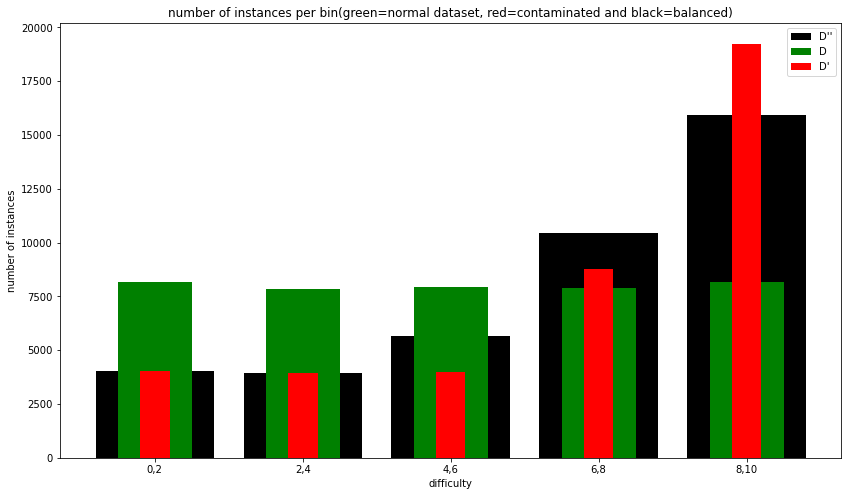

In [43]:
plt.xlabel("difficulty")
plt.ylabel("number of instances")
plt.bar(['0,2','2,4','4,6','6,8','8,10'], myhistAccumBal,width=0.8, color='black')
plt.bar(['0,2','2,4','4,6','6,8','8,10'], myhistAccum,width=0.5, color='green')
plt.bar(['0,2','2,4','4,6','6,8','8,10'], myhistAccumCont,width=0.2, color = 'red')
plt.title("number of instances per bin(green=normal dataset, red=contaminated and black=balanced)")
plt.legend(["D''","D", "D'"])
plt.show()

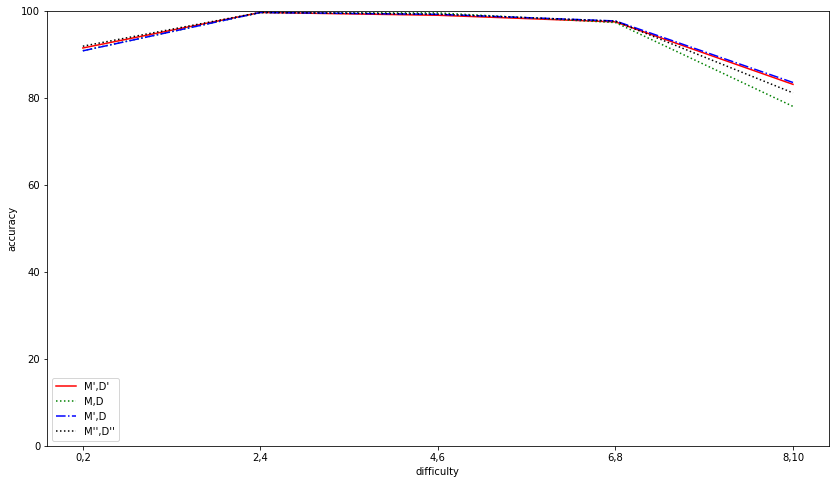

In [44]:
plt.xlabel("difficulty")
plt.ylabel("accuracy")
plt.ylim([0, 100])
plt.plot(['0,2','2,4','4,6','6,8','8,10'], meanPerBinCont*100, ls='-', color = 'red')
plt.plot(['0,2','2,4','4,6','6,8','8,10'], meanPerBin*100, ls=':', color = 'green')
plt.plot(['0,2','2,4','4,6','6,8','8,10'], meanPerBinCont_nor*100, ls='-.', color = 'blue')
plt.plot(['0,2','2,4','4,6','6,8','8,10'], meanPerBinBal*100, ls=':', color = 'black')
plt.legend(["M',D'","M,D", "M',D","M'',D''"])
plt.show()

# M'' on D

In [45]:
myaccBal_nor = np.zeros((20,5))

for myround in range(1,21):
    random.seed(myround)
    np.random.seed(myround)
    tf.random.set_seed(myround)
    data = df.sample(frac=1, random_state=myround)
    df_train = data.iloc[:20000,:]
    df_test = data.iloc[20000:22000,:]
    df_train = df_train.drop(columns="Dffclt")
    for mydiff in range (5):
        df_test_temp = df_test.loc[(df_test['Dffclt'] >= (mydiff*2)) & (df_test['Dffclt'] <= ((mydiff+1)*2))]
        df_test_temp = df_test_temp.drop(columns="Dffclt")
        
        trainX = df_train.drop(columns="class")
        trainY = df_train['class']
        testX = df_test_temp.drop(columns="class")
        testY = df_test_temp['class']
        trainX=np.array(trainX)
        testX=np.array(testX)
        trainX = trainX.reshape((trainX.shape[0], 28, 28, 1))
        testX = testX.reshape((testX.shape[0], 28, 28, 1))
        trainX = trainX/255
        testX = testX/255
        trainY = np_utils.to_categorical(trainY,10)
        testY = np_utils.to_categorical(testY,10)
        from keras.models import load_model
        model = load_model('FashionMnistBalanced'+ str(myround) + '.h5')
        myaccBal_nor[myround-1,mydiff] = (model.evaluate(testX,testY)[1])


12/12 [==============================] - 0s 8ms/step - loss: 0.0837 - accuracy: 0.9685


13/13 [==============================] - 0s 7ms/step - loss: 0.5022 - accuracy: 0.8220


In [46]:
nnBal_nor = 0
meanPerBinBal_nor = np.zeros(5)
for myturn in range (5):
    print((np.mean(myaccBal_nor[:, myturn])))
    meanPerBinBal_nor[myturn] = np.mean(myaccBal_nor[:, myturn])
    nnBal_nor += (np.mean(myaccBal_nor[:, myturn]))
print(nnBal_nor/5)
meanPerBinBal_nor

0.9111282110214234
0.9964099228382111
0.99121775329113
0.9685077548027039
0.8214089691638946
0.9377345222234726


array([0.91112821, 0.99640992, 0.99121775, 0.96850775, 0.82140897])

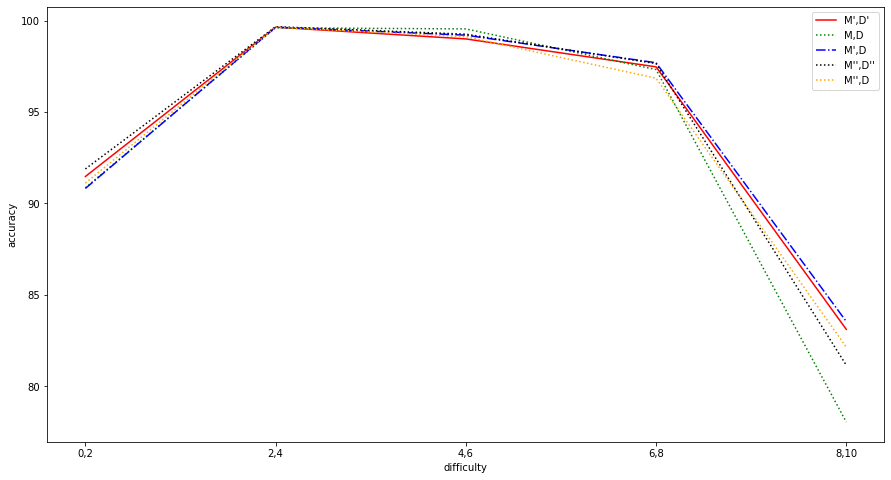

In [60]:
plt.xlabel("difficulty")
plt.ylabel("accuracy")
#plt.ylim([0, 100])
#plt.figure(figsize=(20,10))
plt.rcParams['figure.figsize'] = [10, 6]
plt.plot(['0,2','2,4','4,6','6,8','8,10'], meanPerBinCont*100, ls='-', color = 'red')
plt.plot(['0,2','2,4','4,6','6,8','8,10'], meanPerBin*100, ls=':', color = 'green')
plt.plot(['0,2','2,4','4,6','6,8','8,10'], meanPerBinCont_nor*100, ls='-.', color = 'blue')
plt.plot(['0,2','2,4','4,6','6,8','8,10'], meanPerBinBal*100, ls=':', color = 'black')
plt.plot(['0,2','2,4','4,6','6,8','8,10'], meanPerBinBal_nor*100, ls=':', color = 'orange')

plt.legend(["M',D'","M,D", "M',D","M'',D''","M'',D"])
plt.show()

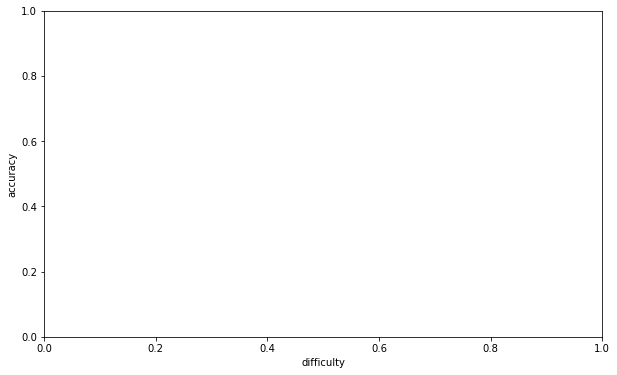

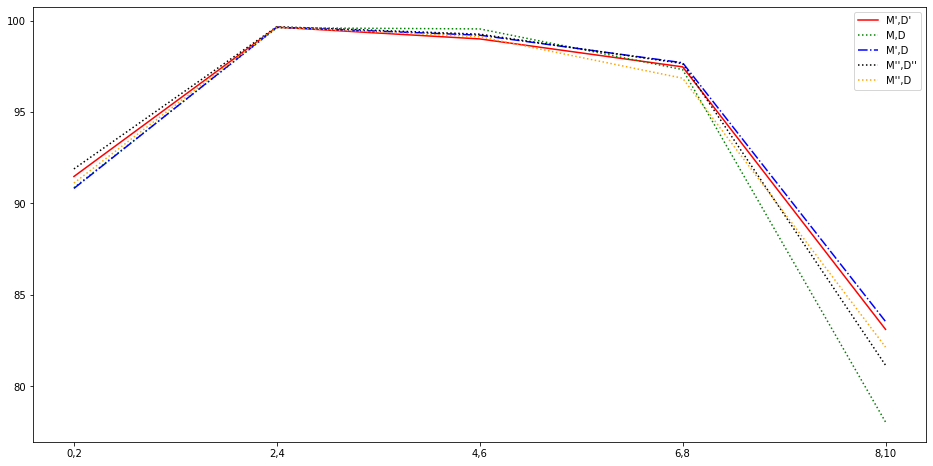

In [48]:
plt.xlabel("difficulty")
plt.ylabel("accuracy")
#plt.ylim([0, 100])
plt.figure(figsize=(16,8))
plt.rcParams['figure.figsize'] = [15, 8]
plt.plot(['0,2','2,4','4,6','6,8','8,10'], meanPerBinCont*100, ls='-', color = 'red')
plt.plot(['0,2','2,4','4,6','6,8','8,10'], meanPerBin*100, ls=':', color = 'green')
plt.plot(['0,2','2,4','4,6','6,8','8,10'], meanPerBinCont_nor*100, ls='-.', color = 'blue')
plt.plot(['0,2','2,4','4,6','6,8','8,10'], meanPerBinBal*100, ls=':', color = 'black')
plt.plot(['0,2','2,4','4,6','6,8','8,10'], meanPerBinBal_nor*100, ls=':', color = 'orange')

plt.legend(["M',D'","M,D", "M',D","M'',D''","M'',D"])
plt.show()

# EasyOut 


In [49]:
myaccEasyOut = np.zeros((20,5))

for myround in range(1,21):
    random.seed(myround)
    np.random.seed(myround)
    tf.random.set_seed(myround)
    df_cd = df.sample(frac=1, random_state=myround)
    hardest = df_cd[25000:]
    hardest = hardest.sort_values('Dffclt', ascending=False)
    hardest = hardest.iloc[:11000,:]
    hardest = hardest.sample(frac=1, random_state=myround)
    contaminated_trianset = hardest.iloc[:10000,:]
    hardest = hardest.iloc[10000:11000,:]
    df_easyout = df_cd .iloc[:22000,:]
    df_easyout = df_easyout.sort_values('Dffclt', ascending=True)
    df_easyout = df_easyout.iloc[6000:,:]
    df_easyout = df_easyout.sample(frac=1, random_state=myround)
    data = df_easyout#.drop(columns="Dffclt")
    df_train = data.iloc[:10000,:]
    df_train = df_train.append(contaminated_trianset, ignore_index=True)
    df_train = df_train.sample(frac=1, random_state=myround)
    df_test = data.iloc[10000:11000,:]
    df_test = df_test.append(hardest, ignore_index=True)
    df_test = df_test.sample(frac=1, random_state=myround)
    df_train = df_train.drop(columns="Dffclt")
    for mydiff in range (1,5):
        df_test_temp = df_test.loc[(df_test['Dffclt'] >= (mydiff*2)) & (df_test['Dffclt'] <= ((mydiff+1)*2))]
        df_test_temp = df_test_temp.drop(columns="Dffclt")
        trainX = df_train.drop(columns="class")
        trainY = df_train['class']
        testX = df_test_temp.drop(columns="class")
        testY = df_test_temp['class']
        trainX=np.array(trainX)
        testX=np.array(testX)
        trainX = trainX.reshape((trainX.shape[0], 28, 28, 1))
        testX = testX.reshape((testX.shape[0], 28, 28, 1))
        trainX = trainX/255
        testX = testX/255
        trainY = np_utils.to_categorical(trainY,10)
        testY = np_utils.to_categorical(testY,10)
        from keras.models import load_model
        model = load_model('FashionMnistEasyout'+ str(myround) + '.h5')
        myaccEasyOut[myround-1,mydiff] = (model.evaluate(testX,testY)[1])


33/33 [==============================] - 1s 8ms/step - loss: 0.4825 - accuracy: 0.8138


In [50]:
myaccEasyOut = myaccCont

In [51]:
nnEasyout = 0
meanPerBinEasyout = np.zeros(5)
for myturn in range (5):
    print((np.mean(myaccEasyOut[:, myturn])))
    meanPerBinEasyout[myturn] = np.mean(myaccEasyOut[:, myturn])
    nnEasyout += (np.mean(myaccEasyOut[:, myturn]))
nnEasyout/5

0.9147315561771393
0.9964345455169678
0.9900009542703628
0.9747241348028183
0.8311145216226578


0.9414011424779891

In [52]:
meanPerBinEasyout

array([0.91473156, 0.99643455, 0.99000095, 0.97472413, 0.83111452])

# Easyout on Normal

In [53]:
myaccEasy_nor = np.zeros((20,5))

for myround in range(1,21):
    random.seed(myround)
    np.random.seed(myround)
    tf.random.set_seed(myround)
    data = df.sample(frac=1, random_state=myround)
    df_train = data.iloc[:20000,:]
    df_test = data.iloc[20000:22000,:]
    df_train = df_train.drop(columns="Dffclt")
    for mydiff in range (5):
        df_test_temp = df_test.loc[(df_test['Dffclt'] >= (mydiff*2)) & (df_test['Dffclt'] <= ((mydiff+1)*2))]
        df_test_temp = df_test_temp.drop(columns="Dffclt")
        
        trainX = df_train.drop(columns="class")
        trainY = df_train['class']
        testX = df_test_temp.drop(columns="class")
        testY = df_test_temp['class']
        trainX=np.array(trainX)
        testX=np.array(testX)
        trainX = trainX.reshape((trainX.shape[0], 28, 28, 1))
        testX = testX.reshape((testX.shape[0], 28, 28, 1))
        trainX = trainX/255
        testX = testX/255
        trainY = np_utils.to_categorical(trainY,10)
        testY = np_utils.to_categorical(testY,10)
        from keras.models import load_model
        model = load_model('FashionMnistEasyout'+ str(myround) + '.h5')
        myaccEasy_nor[myround-1,mydiff] = (model.evaluate(testX,testY)[1])


12/12 [==============================] - 0s 5ms/step - loss: 0.0479 - accuracy: 0.9843


13/13 [==============================] - 0s 7ms/step - loss: 0.4194 - accuracy: 0.8366


In [54]:
nnEasy_nor = 0
meanPerBinEasy_nor = np.zeros(5)
for myturn in range (5):
    print((np.mean(myaccEasy_nor[:, myturn])))
    
    meanPerBinEasy_nor[myturn] = np.mean(myaccEasy_nor[:, myturn])
    nnEasy_nor += (np.mean(myaccEasy_nor[:, myturn]))
print(nnEasy_nor/5)
meanPerBinEasy_nor

0.9071112483739853
0.9974509477615356
0.9960698425769806
0.9852371096611023
0.9068050742149353
0.9585348445177078


array([0.90711125, 0.99745095, 0.99606984, 0.98523711, 0.90680507])

# retrieve Data

In [18]:
# meanPerBin = np.array([0.79911429, 0.8317701 , 0.8279106 , 0.81521758, 0.81394129,0.79659775, 0.78136204, 0.7744887 , 0.74064942, 0.67989944])
# meanPerBinCont = np.array([0.7800258,  0.83596367, 0.83271156, 0.81696018, 0.82122909, 0.79755006, 0.79041608, 0.76958496, 0.74295535, 0.69217899])
# meanPerBinCont_nor = np.array([0.79357795, 0.83053856, 0.82169406, 0.82186363, 0.82370602, 0.79388916, 0.77930374, 0.77309898, 0.74168162, 0.68372838])
# meanPerBinBal = np.array([0.78498974, 0.83855680, 0.82553396, 0.82107758, 0.81414839, 0.80924323, 0.81469207, 0.76007291, 0.73365259, 0.69200589])
# meanPerBinBal_nor = np.array([0.79348715, 0.83166712, 0.82205704, 0.81883997, 0.81243234, 0.79869765, 0.78910854, 0.77951118, 0.73790904, 0.69339632])
# meanPerBinEasyout = np.array([0.79334218 , 0.79334218 , 0.79334218, 0.80756179, 0.8131354 , 0.79361026, 0.79262054, 0.78199897, 0.73976877, 0.70033181])
# meanPerBinEasy_nor = np.array([0.78499383, 0.82561504, 0.82931231, 0.82032643, 0.81302297, 0.78776397, 0.79233419, 0.77548839, 0.74970538, 0.69538593])

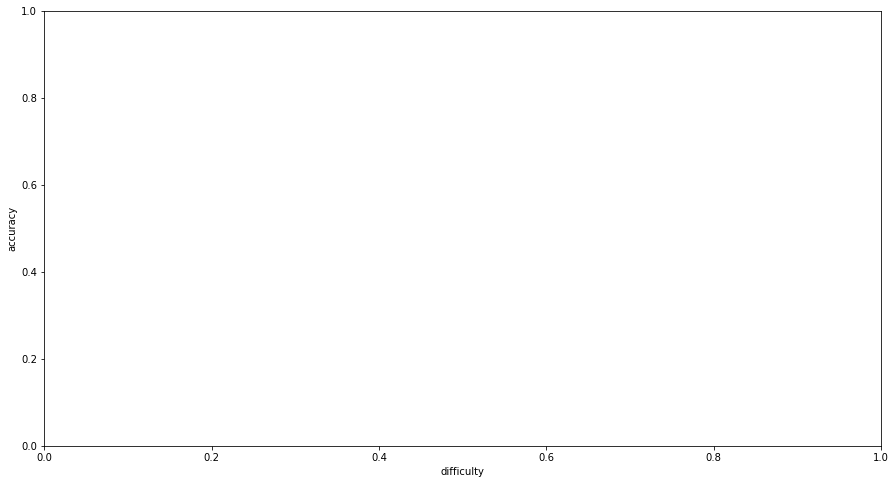

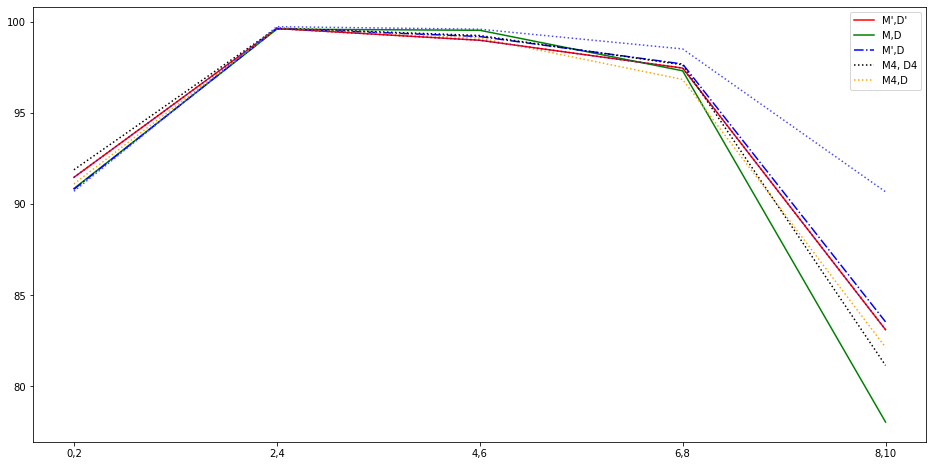

In [55]:
plt.xlabel("difficulty")
plt.ylabel("accuracy")
#plt.ylim([0, 100])
plt.figure(figsize=(16,8))
plt.rcParams['figure.figsize'] = [15, 8]
plt.plot(['0,2','2,4','4,6','6,8','8,10'], meanPerBinCont*100, ls='-', color = 'red')
plt.plot(['0,2','2,4','4,6','6,8','8,10'], meanPerBin*100, ls='-', color = 'green')
plt.plot(['0,2','2,4','4,6','6,8','8,10'], meanPerBinCont_nor*100, ls='-.', color = 'blue')
plt.plot(['0,2','2,4','4,6','6,8','8,10'], meanPerBinBal*100, ls=':', color = 'black')
plt.plot(['0,2','2,4','4,6','6,8','8,10'], meanPerBinBal_nor*100, ls=':', color = 'orange')
plt.plot(['0,2','2,4','4,6','6,8','8,10'], meanPerBinEasyout*100, ls=':', color = 'purple')
plt.plot(['0,2','2,4','4,6','6,8','8,10'], meanPerBinEasy_nor*100, ls=':', color = '#4649FF')


#plt.legend(["M',D'","M,D", "M',D","M'',D''","M'',D", "M4, D4", "M4,D"])
plt.legend(["M',D'","M,D", "M',D","M4, D4", "M4,D"])
plt.show()

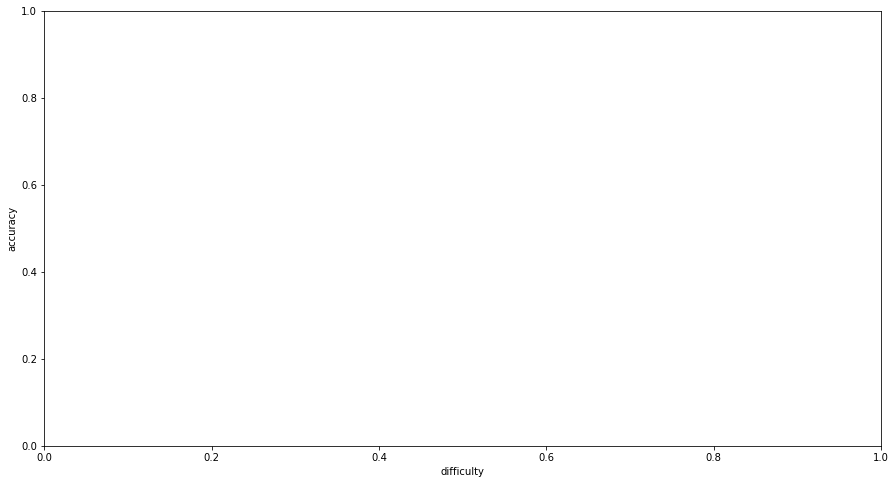

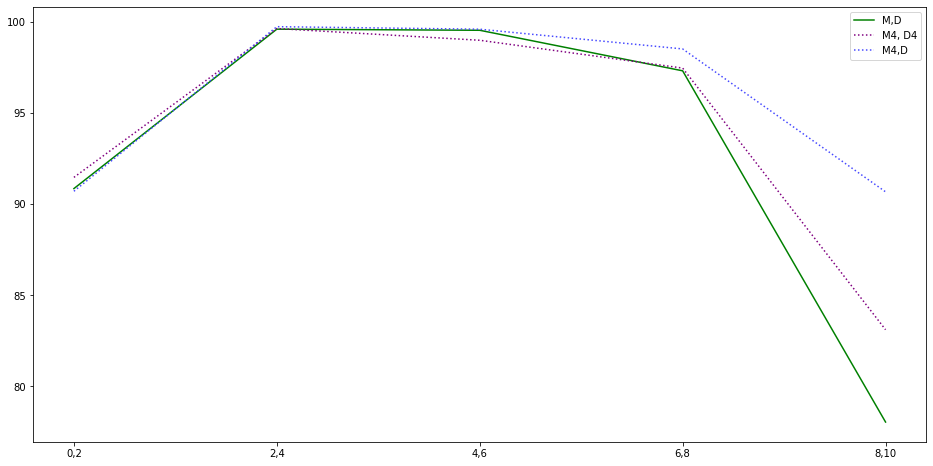

In [56]:
plt.xlabel("difficulty")
plt.ylabel("accuracy")
#plt.ylim([0, 100])
plt.figure(figsize=(16,8))
plt.rcParams['figure.figsize'] = [15, 8]
plt.plot(['0,2','2,4','4,6','6,8','8,10'], meanPerBin*100, ls='-', color = 'green')
plt.plot(['0,2','2,4','4,6','6,8','8,10'], meanPerBinEasyout*100, ls=':', color = 'purple')
plt.plot(['0,2','2,4','4,6','6,8','8,10'], meanPerBinEasy_nor*100, ls=':', color = '#4649FF')


plt.legend(["M,D", "M4, D4", "M4,D"])
plt.show()